In [5]:
from root_pandas import read_root
import matplotlib.pyplot as plt
from bd2dst3pi.locations import loc
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib
from bd2dst3pi.definitions import years, magnets
import os.path as op
from os import makedirs
import sys
sys.path.append(loc.SCRIPTS)
import functions as fct


#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
mpl.rcParams['axes.unicode_minus'] = False

# Load variables

Needed variables:
- B0_M and BDT
- B0_ENDVERTEX_X, B0_ENDVERTEX_Y, B0_ENDVERTEX_Z
- tau_ENDVERTEX_X, tau_ENDVERTEX_Y, tau_ENDVERTEX_Z
- tau_ENDVERTEX_XERR, tau_ENDVERTEX_YERR, tau_ENDVERTEX_ZERR

In [6]:
variables = []

for particle in 'B0', 'Dst', 'D0','tau':
    variables.append(f"{particle}_M")

for particle in 'B0', 'tau':
    for axis in 'X','Y','Z':
        variables.append(f'{particle}_ENDVERTEX_{axis}')
        variables.append(f'{particle}_ENDVERTEX_{axis}ERR')

variables.append('BDT')

In [7]:
df = fct.load_data(years,magnets,type_data = 'data_strip',vars = variables)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//stripped/data/data_90000000_2016_down.root


# B0_M vs BDT

In [8]:
name_BDT = 'adaboost_0.8_without_P_cutDeltaM'
low_B0_M = 5050.
high_B0_M = 5550.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/B0_MvsBDT.pdf


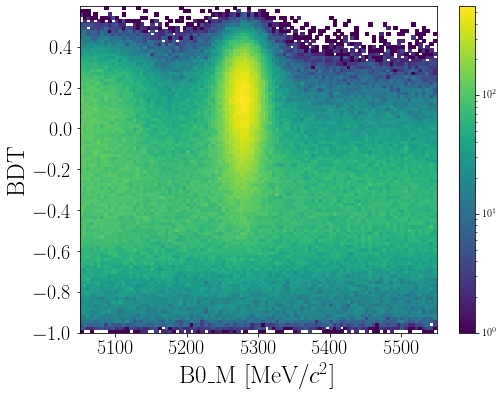

In [10]:
fct.plot_hist2d(df,['B0_M','BDT'],['B0\_M','BDT'],['MeV/$c^2$',None],low=[low_B0_M,None],high=[high_B0_M,None],
            name_folder = name_BDT,log_scale = True)

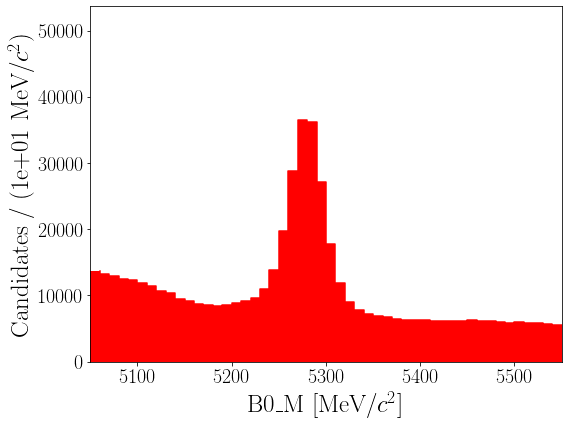

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/B0_M.pdf


In [11]:
fct.plot_hist({'data':df},'B0_M', 'B0\_M', 'MeV/$c^2$', n_bins = 50,mode_hist=True,  low = low_B0_M, high = high_B0_M,
            name_file = 'B0_M',name_folder = name_BDT)

# B0_M vs tau_flight

In [14]:
df = fct.add_flight_distance_tau(df)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/B0_Mvstau_flight.pdf


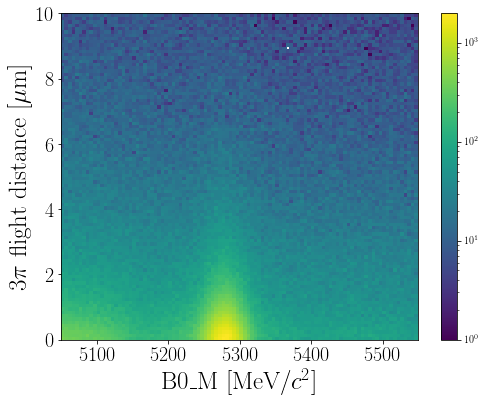

In [15]:
fct.plot_hist2d(df,['B0_M','tau_flight'],['B0\_M','3$\pi$ flight distance'],['MeV/$c^2$','$\mu$m'],
            low=[low_B0_M,0],high=[high_B0_M,10], log_scale = True,
            name_folder = name_BDT)

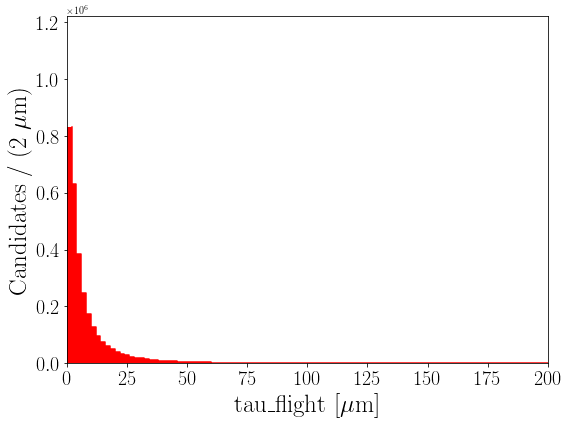

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_flight.pdf


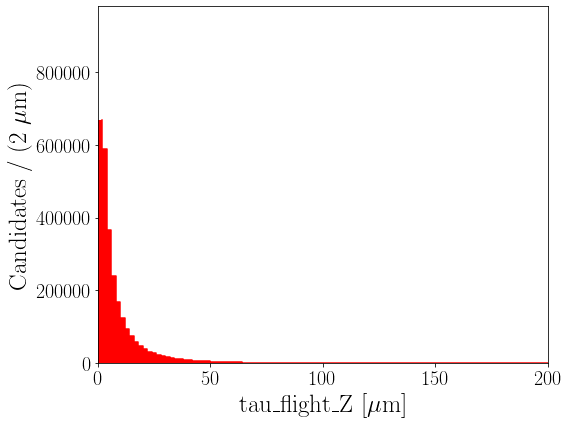

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_flight_Z.pdf


In [16]:
fct.plot_hist({'data':df},'tau_flight', 'tau\_flight', '$\mu$m', n_bins = 100,mode_hist=True,low = 0, high = 200,
            name_file = 'tau_flight',name_folder = name_BDT)
fct.plot_hist({'data':df},'tau_flight_Z', 'tau\_flight\_Z', '$\mu$m', n_bins = 100,mode_hist=True,low = 0, high = 200,
            name_file = 'tau_flight_Z',name_folder = name_BDT)

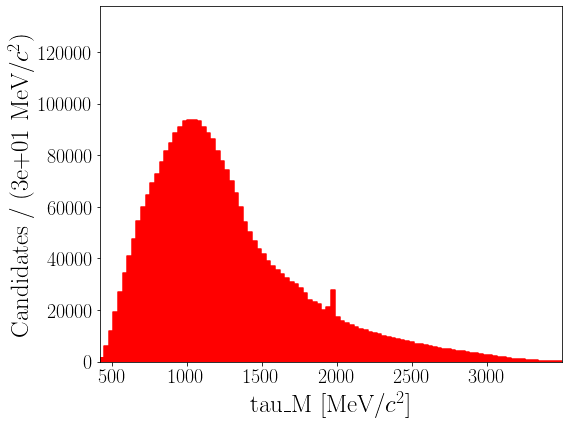

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_M.pdf


In [17]:
fct.plot_hist({'data':df},'tau_M', 'tau\_M', 'MeV/$c^2$', n_bins = 100,mode_hist=True,
            name_file = 'tau_M',name_folder = name_BDT)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_Mvstau_flight.pdf


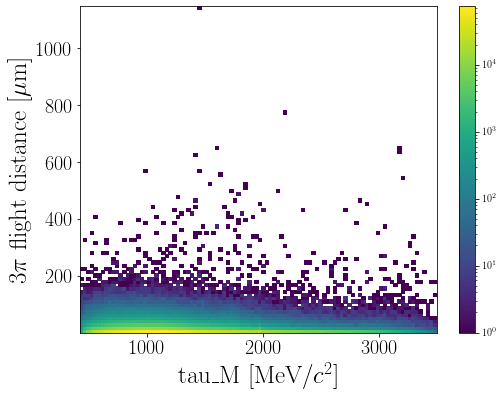

In [19]:
fct.plot_hist2d(df,['tau_M','tau_flight'],['tau\_M','3$\pi$ flight distance'],['MeV/$c^2$','$\mu$m'],
            low=[None,None],high=[None,None], log_scale = True,
            name_folder = name_BDT)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/adaboost_0.8_without_P_cutDeltaM/tau_Mvstau_flight.pdf


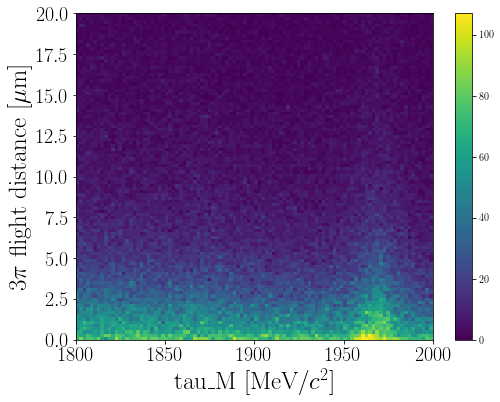

In [20]:
fct.plot_hist2d(df,['tau_M','tau_flight'],['tau\_M','3$\pi$ flight distance'],['MeV/$c^2$','$\mu$m'],
            low=[1800,0],high=[2000,20], 
            name_folder = name_BDT)